## 1) Commuter Trips

In [1]:
import pandas as pd

### Finding commuter trips (5 most popular trips)

##### Definition of Commuter trip: Commuter trips are the trips that are most popular. For finding the most popular trips, we are counting total number of trips between all possible combinations of start and end stations.

In [2]:
# Finding top 5 commuter trips
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT start_station_name, end_station_name, count(*) as trip_freq FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY start_station_name, end_station_name ORDER BY trip_freq DESC LIMIT 5' > result.csv

Waiting on bqjob_r1917ab5fbe067c39_00000177808bef20_1 ... (0s) Current status: DONE   


In [3]:
pop_trips = pd.read_csv('result.csv')
pop_trips

,start_station_name,end_station_name,trip_freq
0,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,9150
1,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,8508
2,2nd at Townsend,Harry Bridges Plaza (Ferry Building),7620
3,Harry Bridges Plaza (Ferry Building),2nd at Townsend,6888
4,Embarcadero at Sansome,Steuart at Market,6874


[Text(0.5, 1.0, 'Popular trips')]

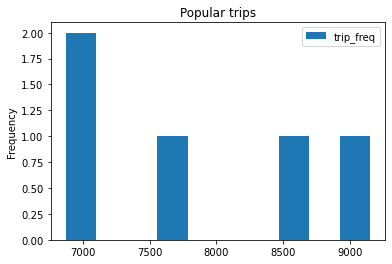

In [4]:
fig_hist = pop_trips.plot(y = ['trip_freq'], kind = 'hist')
fig_hist.set(title = "Popular trips")

## 2) Recommendations for offers

### Findings & Recommendations

##### Finding 1 - Bike Usage by Month

In [5]:
# Finding peak months based on number of trips
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT EXTRACT(Month FROM start_date) AS Month, COUNT(trip_id) AS trip_frequency from `bigquery-public-data.san_francisco.bikeshare_trips` group by Month order by trip_frequency desc' > monthly_trips.csv

Waiting on bqjob_r3cfaac84221dbd05_00000177808c0abf_1 ... (0s) Current status: DONE   


In [6]:
monthly_trips = pd.read_csv('monthly_trips.csv')

In [7]:
di = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}
monthly_trips["Month_name"] = monthly_trips["Month"].map(di)
monthly_trips

,Month,trip_frequency,Month_name
0,8,95576,August
1,10,94378,October
2,6,91672,June
3,7,89539,July
4,9,87321,September
5,5,86364,May
6,4,84196,April
7,3,81777,March
8,11,73091,November
9,1,71788,January


(55000.0, 100000.0)

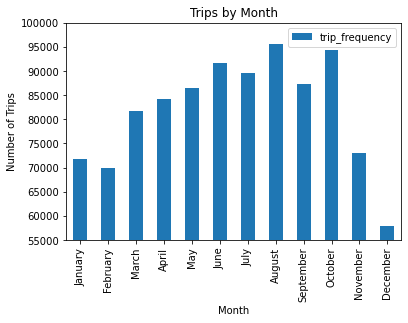

In [8]:
#monthly_trips.trip_frequency.()

fig_bar = monthly_trips.sort_values(by = "Month").plot(y = ['trip_frequency'], x = 'Month_name', kind = 'bar')
fig_bar.set(xlabel = "Month", ylabel = "Number of Trips", title = "Trips by Month")
fig_bar.set_ylim(55000, 100000)
 

**Analysis:**

The above chart shows number of trips per month aggregated over the whole dataset from the year 2013 to 2016.

The bar plot shows a consistent growth in the number of rides over the months and reaches its peak usage in the month of August. In addition, there's a large increase in the number of rides between a period of May to August and October, which may be due to warm and pleasant weather in the SF Bay area. 

Moreover, the number of bike trips decrease once it hits start of november as is evident from the chart above. These 4 months, November to February are least busy months for ridership, which may be associated to the cold weather. 

We can also see in the chart that the ridership is the least during the month of December. This may be associated to the holiday season when most of the workplaces are closed. This also concludes that riders use bikes to commute from stations to their workplace.

**Recommendations:**

Since there are less rides during months of November to February, we can offer more promotion for the riders who are on either 24-hour or 3-day member. This will encourage riders to avail the promotions or discounts and will help maintain the revenue during downturn months.

Since Decemeber sees lowest downturn, group discounts or Holiday promotions can be offered that can be availed by family/friends and the tourists who generally visits SF area to enjoy sightseeing together as a group.


#### Finding 2 - Bike Usage by hour in a day

In [9]:
# Finding peak time of the day for bike riding
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT EXTRACT(hour FROM end_date) AS hour, count(trip_id) as trips from `bigquery-public-data.san_francisco.bikeshare_trips` group by hour order by trips desc' > hourly_trips.csv

Waiting on bqjob_r568fde51e935fca9_00000177808c24a3_1 ... (0s) Current status: DONE   


In [10]:
hourly_trips = pd.read_csv('hourly_trips.csv')
hourly_trips

,hour,trips
0,17,129072
1,8,123941
2,9,108459
3,18,96317
4,16,81238
5,7,56198
6,19,47273
7,10,44897
8,12,44867
9,13,43805


[Text(0.5, 0, 'Hour-in-24HR Format'),
 Text(0, 0.5, 'Number of trips'),
 Text(0.5, 1.0, 'Trips by hour')]

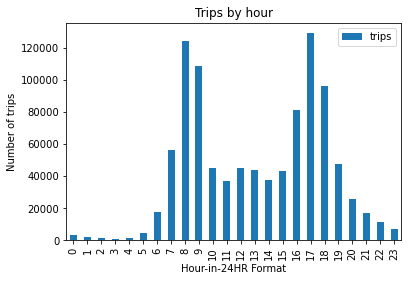

In [11]:
#hourly trips
fig_bar = hourly_trips.plot(y = ['trips'], x = 'hour', kind = 'bar')
fig_bar.set(xlabel = "Hour-in-24HR Format", ylabel = "Number of trips", title = "Trips by hour")

**Analysis:**

The chart above shows the number of trips per hour aggregated over the whole dataset.

The plot clearly shows the peaks at 8 AM and 5 PM. This confirms that the bike share system is the busiest during commute hours to work and back home (8-9am and 4-6pm). Along the same lines, rides are moderate betweeen 10am - 4pm and then the quietest hours are from 11pm towards midnight and till morning 5am.

**Recommendations:**

1) Huge promotions should be offered once the clock hits 9pm and charges should be negligible until morning 5am, to encourage riders trip.

2) During peak hours such as around 8am and 5pm, trips can be charged per minute to increase the revenue as the demand is high.

3) Since, it is inferred that most commuters are using rides for commuting to workplace, Corporate membership should be introduced in a partnership with local offices to encourage workers to use bike rides.

4) Seeing that we have least riders during the wee hours in the night, that time period can be used for either dock or bike servicing and maintenance.


#### Finding 3: Distribution of Ride duration

In [12]:
# Distribution of Ride duration

! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT count(trip_id) as number_of_rides, round((duration_sec/60)) AS total_duration_min FROM `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips` GROUP BY duration_sec ORDER BY number_of_rides desc' > trip_duration.csv

Waiting on bqjob_r5945596167d32063_00000177808c4776_1 ... (0s) Current status: DONE   


In [13]:
trip_duration = pd.read_csv('trip_duration.csv')
trip_duration

,number_of_rides,total_duration_min
0,2880,6.0
1,2852,6.0
2,2841,7.0
3,2822,6.0
4,2819,6.0
...,...,...
23592,1,1076.0
23593,1,619.0
23594,1,878.0
23595,1,875.0


(0.0, 40.0)

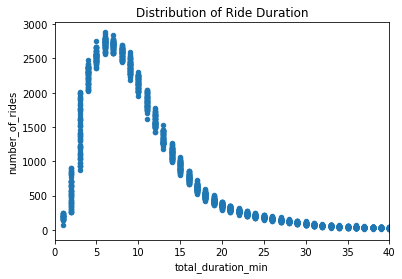

In [14]:
#Trip duration
fig_scatter = trip_duration.plot(y = ['number_of_rides'], x = 'total_duration_min', kind = 'scatter')
fig_scatter.set(xlabel = "total_duration_min", ylabel = "number_of_rides", title = "Distribution of Ride Duration")
fig_scatter.set_xlim(0, 40)
 

**Analysis:**

The above chart shows the distribution of ride duration aggregated over the whole dataset.

The plot clearly shows that the maximum number of trips lasts between 5-10mins. The trips with durations of more than 20 minutes are very less in number.

The distribution is heavily skewed to the left side of the plot, reinforcing the idea that the bikes are generally used for short trips.

**Recommendations:**

The bike share system offers a short-term mode of transport, and this should reflect in its pricing structure too.

There should be an offer to promote rental of 15-minute and 30-minute for all the riders, in order to increase the duration of trip. 

This will also increase the availability of bikes during peak commute hours as riders will tend to end their trip within 15 or 30 minutes. This follows a tiered structure of pricing for certain time intervals that will encourage riders to avail the offer. 


#### Finding 4 - Average duration of ride for subscriber vs customer

In [15]:
# Average duration of ride for subscriber vs customer
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT subscriber_type,ROUND(avg(duration_sec/60), 1) AS total_duration_min FROM `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips` GROUP BY subscriber_type ORDER BY total_duration_min DESC' > bike_usage.csv


Waiting on bqjob_r53b1235f392edda5_00000177808c6bf9_1 ... (0s) Current status: DONE   


In [16]:
bike_usage = pd.read_csv('bike_usage.csv')
bike_usage

,subscriber_type,total_duration_min
0,Customer,50.0
1,Subscriber,10.5


**Analysis:**

As per the data above, it shows that riders who have 'Customer' subscription(24-hour or 3-day member) ride for longer duration than the one who has subscription as a 'Subscriber(annual or 30-day member)'. This clearly indicates that the riders who take 1 day or a 3-day pass mostly go for unplanned trips or, are taking 1 day tour to some place in SF bay area, and, they are not regular commuters. 


#### Finding 5 - Trip trend for the most popular station pairs over the years.

In [17]:
# trip trend for the most popular station
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT EXTRACT(year FROM start_date) AS year, EXTRACT(month FROM start_date) AS month, count(trip_id) as number_of_trips from `bigquery-public-data.san_francisco.bikeshare_trips` where  start_station_name = "Harry Bridges Plaza (Ferry Building)" and end_station_name = "Embarcadero at Sansome" group by year, month order by month desc' > trip_trend.csv

Waiting on bqjob_r5759cf0637900a97_00000177808c807f_1 ... (0s) Current status: DONE   


In [18]:
trip_trend = pd.read_csv('trip_trend.csv')
trip_trend

,year,month,number_of_trips
0,2013,12,164
1,2015,12,147
2,2014,12,194
3,2015,11,195
4,2013,11,171
5,2014,11,37
6,2014,10,215
7,2013,10,279
8,2015,10,242
9,2015,9,276


**Analysis:**

This data shows that the number of trips over the years for the most popular station pairs has been pretty consistent. This data can be used for below offers and Opportunities:

1) Offer free trips for the popular stations over the weekends. 

2) The popular stations would need more maintenance as compared to other station pairs due to high usage.

3) These popular stations can be used for advertising promotions or distributing promotion coupons as these stations are most visited. 

4) There is also an opportunity of increasing the docking stations and making more bikes available to the frequent commuters to make their transit easy, on these popular stations.